In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Question 1:**

***Overview answer***

When we use df.head(), we get that the structure of the CSV for the first five examples has 8 features that full_text, summary, keywords, etc. Additionally, when we use df.shape, we can see the samples and features represented as a tuple, with the x-value as the number of samples, and the y-value as the features. We can see that there are 3476 samples and 8 features in the dataset based on df.shape

***Plots Interpreted***

1) The first plot is right-skewed with a majority of the data points having between 0 to 10000 alphanumeric characters
2) All of the leaf label bars have about the same number of data points (350 data points), except for the last data point with 326. Thus, generally speaking, they all have mostly the same number of data points
3) All of the root label bars also have similar amounts too (around the 1700 data points mark), thus the two bars are about the same size.


In [5]:
df = pd.read_csv('/Users/anshulkc/Downloads/Project1-ClassificationDataset.csv')

print(df.head())
print(df.shape)

                                           full_text  \
0  'Personalize Your NBA App Experience for the '...   
1  'Mike Will attends the Pre-GRAMMY Gala and GRA...   
2  'The Golden State Warriors are struggling to f...   
3  'On Nov. 28, the NBA and Nike will collaborate...   
4  'The NBA announced additions and innovations t...   

                                             summary  \
0  'Personalize Your NBA App Experience for the '...   
1  'Mike WiLL Made-It has secured a partnership w...   
2  'The Golden State Warriors are struggling to f...   
3  'On Nov. 28, the NBA and Nike will collaborate...   
4  'The NBA announced additions and innovations t...   

                                            keywords  \
0  ['original', 'content', 'live', 'slate', 'game...   
1  ['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...   
2  ['insider', 'york', 'thing', 'nbc', 'tag', 'nb...   
3  ['watch', 'telecast', 'ultimate', 'membership'...   
4  ['experience', 'bring', 'media', 'crennan',

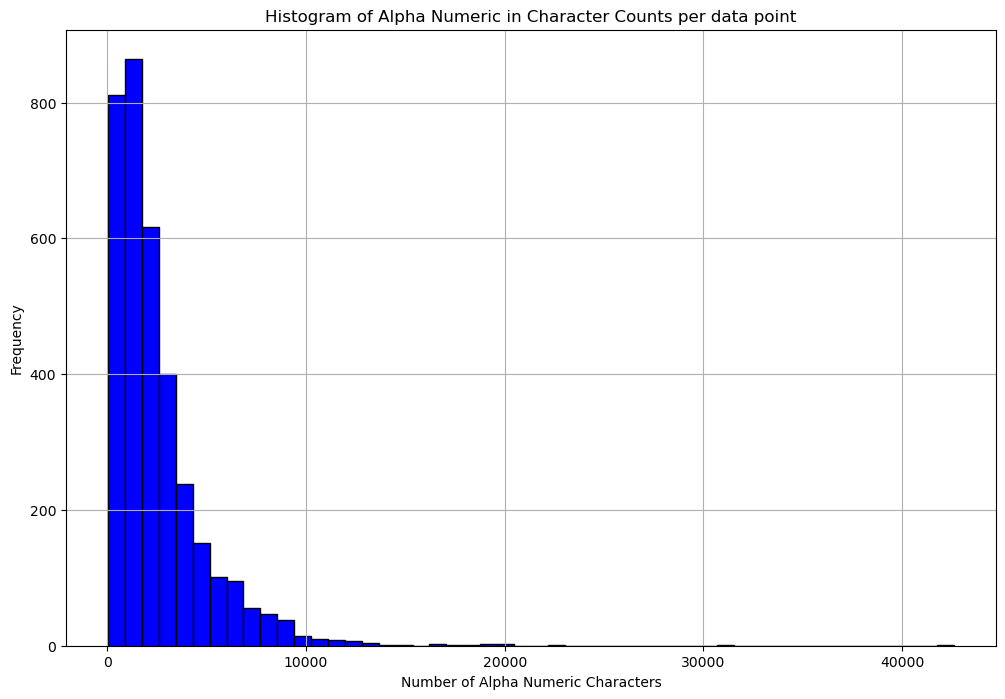

count     3476.000000
mean      2520.666283
std       2453.936223
min         42.000000
25%        960.750000
50%       1807.000000
75%       3231.000000
max      42590.000000
Name: alpha_numeric_count, dtype: float64


In [6]:
df['alpha_numeric_count'] = df['full_text'].str.count(r'[a-zA-z0-9]')

df['alpha_numeric_count'].hist(bins=50,color='blue', edgecolor='black', figsize=(12,8))
plt.title('Histogram of Alpha Numeric in Character Counts per data point')
plt.xlabel('Number of Alpha Numeric Characters')
plt.ylabel('Frequency')
plt.show()

print(df['alpha_numeric_count'].describe())

leaf_label
basketball     350
baseball       350
tennis         350
football       350
soccer         350
forest fire    350
flood          350
earthquake     350
heatwave       350
drought        326
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


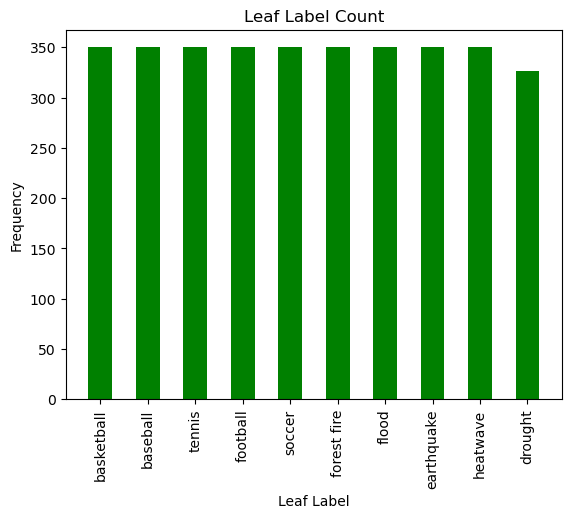

In [7]:
from collections import Counter

counts = df['leaf_label'].value_counts()
print(counts)
print(type(counts))

# access key-value pair of series data
keys = counts.index
values = counts.values
index_array = np.arange(len(keys))


plt.bar(index_array, values, 0.5, color='green')
plt.xticks(index_array, keys, rotation = 90)

plt.title('Leaf Label Count')
plt.ylabel('Frequency')
plt.xlabel('Leaf Label')
plt.show()
           
# TODO: come back to this question to complete part b and part c and interpret the plots

root_label
sports     1750
climate    1726
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


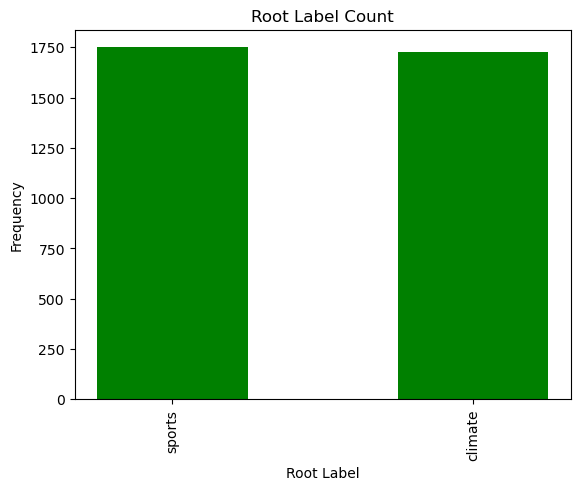

In [8]:
from collections import Counter

counts = df['root_label'].value_counts()
print(counts)
print(type(counts))

# access key-value pair of series data
keys = counts.index
values = counts.values
index_array = np.arange(len(keys))


plt.bar(index_array, values, 0.5, color='green')
plt.xticks(index_array, keys, rotation = 90)

plt.title('Root Label Count')
plt.ylabel('Frequency')
plt.xlabel('Root Label')
plt.show()

===============================================================================================================

**Question 2: Report the number of training and testing samples:**

We find that there are 2780 training dataset samples and 696 testing dataset samples.

In [11]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text", "root_label"]], test_size=0.2)

print(train.count())
print(test.count())

full_text     2780
root_label    2780
dtype: int64
full_text     696
root_label    696
dtype: int64


===================================================================================================================

**Question 3: Extract features from the textual data**

- Before doing anything, please clean each data sample using the code block provided above.
This function helps remove many but not all HTML artefacts from the crawler’s output. You
can also build your own cleaning module if you find this function to be ineffective.
    - Use the “english” stopwords of the CountVectorizer
    - Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)
    - Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag
    - Use min df=3

*Please answer the following questions:*
- What are the pros and cons of lemmatization versus stemming? How do these processes affect
the dictionary size?
- min df means minimum document frequency. How does varying min df change the TF-IDF
matrix?
- Should I remove stopwords before or after lemmatizing? Should I remove punctuations before
or after lemmatizing? Should I remove numbers before or after lemmatizing? Hint: Recall
that the full sentence is input into the Lemmatizer and the lemmatizer is tagging the position
of every word based on the sentence structure.
- Report the shape of the TF-IDF-processed train and test matrices. The number of rows should
match the results of Question 2. The number of columns should roughly be in the order of
k ×103. This dimension will vary depending on your exact method of cleaning and lemmatizing
and that is okay.

***Answers***

1. Lemmatization is when you convert any given word to its base/dictionary word by analyzing parts of speech whereas stemming is just removing the rightmost characters of words and hope it maps word derivatives to the same root word. Thus, with lemmatization, you produce linguistically valid words with higher accuracy and better handle irregular word forms. However, this is much or computationally expensive and slower to do. On the flip side, stemming is much faster due to the simple rule of chopping off the right side of letters, thus is requires a lot less computational resources. However, it can produce invalid words and is less accurate with irregular word forms. As a result, the stemmers will often have more aggressive reduction on the vocabulary while the lemmatization is more accurate, thus is has more conservative reduction.
2. You remove everything after lemmatization is complete. The reason is that you want to maintain the sentence structure and context so that the lemmatization is more accurate. After lemmatization, the stopwords and punctuations and numbers don't change, thus, they can be easily removed.
3. 
- TF_IDF train matrix:  (2780, 13500); 
- TF_IDF test matrix:  (696, 13500)

In [15]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [16]:
train = train.map(clean)
test = test.map(clean)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
import re


nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer() # callable handles preprocessing, tokenization, and n-grams generation

count_vect = CountVectorizer(min_df=3, stop_words='english')

def remove_numbers(text):
    text = re.sub(r"[+-]?\d*\.?\d+", '', text)
    if text == "":
        text = ""
    return (text for text in lemmatize_sent(analyzer(text)))

def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a', 'VB':'v','RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

# convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(analyzer = remove_numbers, min_df = 3, stop_words='english') 

# convert training and test text to number counts
# fit() --> converts text into matrix of token counts, each cell represents freq of term in document
# transform() --> applies fit() calculations to every feature f
x_train_counts = vectorizer.fit_transform(train['full_text']) 
x_test_counts = vectorizer.transform(test['full_text'])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshulkc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anshulkc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfid_f = TfidfTransformer()

x_train_tfid_f = tfid_f.fit_transform(x_train_counts)
x_test_tfid_f = tfid_f.fit_transform(x_test_counts)


In [19]:
# (samples, unique features/words)

print("TF_IDF train matrix: ", x_train_tfid_f.shape)
print("TF_IDF test matrix: ", x_test_tfid_f.shape)

TF_IDF train matrix:  (2780, 13500)
TF_IDF test matrix:  (696, 13500)


===================================================================================================================

**Question 4: Reduce the dimensionality of the data**

1. Plot the explained variance ratio across multiple different k = [1, 5, 10, 25, 50, 100, 500, 1000]
for LSI and for the next few sections choose k = 25. What does the explained variance ratio
plot look like? What does the plot’s concavity suggest?
2. With k = 25 found in the previous sections, calculate the reconstruction residual MSE error
when using LSI and NMF – they both should use the same k = 25. Which one is larger, the
∥X − WH∥2F in NMF or the ∥X − UkΣkVTk∥2F in LSI and why?



***Answers***
1) The plot has a concave shape, starting steep and gradually flattening out as k increases. For small k, the explained variance increases rapidly because the first few components caputrue the most variance in the data, but for larger values of k, the curve flattens as additional components capture the diminishing amounts of variance. This suggests that the first few singular values capture the most important structure of the data anhd that more components provide diminishing returns for explained variance.
2) The reconstruction residual MSE error using LSI was larger perhaps because the NMF might have done a better job reconstructing the original matrix X from components W and H and also due to alignment with non negative constraints. 

Text(0, 0.5, 'Explained Variance Ratio')

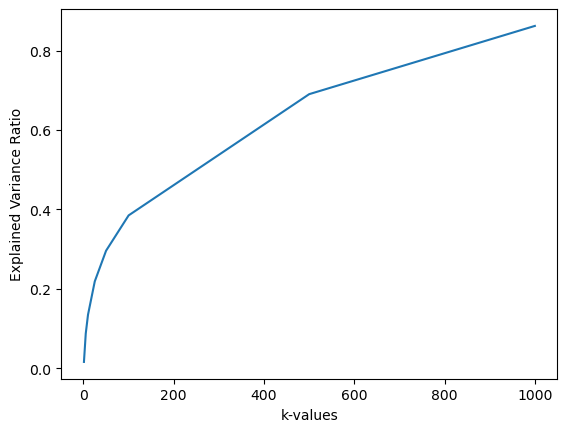

In [51]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer

# select top k dimensions
k = [1, 5, 10, 25, 50, 100, 500, 1000]
variance_array = []

#n_components defines the dimensions and we use random_state for predictability
for values in k: 
    # svd to achieve LSI representation
    truncated_svd = TruncatedSVD(n_components=values, random_state=0)
    # learn the parameters from the data and apply the transformation to the same data with the learned parameters
    x_train_LSI = truncated_svd.fit_transform(x_train_tfid_f)
    # apply the transformations using the parameters from fit without recalculating them
    x_test_LSI = truncated_svd.transform(x_test_tfid_f)
    
    # then calculate the explained variance ratio
    explained_variance = truncated_svd.explained_variance_ratio_.sum()
    variance_array.append(explained_variance)


plt.plot(k, variance_array)
plt.xlabel('k-values')
plt.ylabel('Explained Variance Ratio')

In [53]:
# steps for NMF
#  start with the TF-IDF matrix X
# factorize X into 2 matrices W and K
    # minimize difference b/w X and WH where W is the document to topic relationships and H is the topic to term relationships
    # row of W --> how much a document is related to each topic
    # column of H --> topic to term relationships
# fit the test data by finding the W_test that minimizes the differences 

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

X_train_dense = x_train_tfid_f.toarray()
X_test_dense = x_test_tfid_f.toarray()

lsi_mod = TruncatedSVD(n_components=25, random_state=0)

U = lsi_mod.fit_transform(X_train_dense)
Sigma = np.diag(lsi_mod.explained_variance_)
V_t = lsi_mod.components_
new_X_lsi = U.dot(Sigma).dot(V_t)

mse_lsi = mean_squared_error(X_train_dense, new_X_lsi)

nmf_model = NMF(n_components=25, random_state=0)

W = nmf_model.fit_transform(X_train_dense)
H = nmf_model.components_
new_X_nmf = W.dot(H)

mse_nmf = mean_squared_error(X_train_dense, new_X_nmf)

print("NMF Mean Square Error: ", mse_nmf)
print("LSI Mean Square Error: ", mse_lsi)


NMF Mean Square Error:  5.0243963109871694e-05
LSI Mean Square Error:  7.350789629279524e-05


===================================================================================================================

**QUESTION 5: Compare and contrast hard-margin and soft-margin linear SVMs**

*Train two linear SVMs:*
- Train one SVM with γ = 2000 (hard margin), another with γ = 0.0005 (soft margin).
- Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall, precision, and F-1 score of both SVM classifiers on the testing set. 
- Questions:
  - Which one performs better? 
  - What about for γ = 100000?
  - What happens for the soft margin SVM? Why is this the case? Analyze in terms of the confusion matrix.
    - Does the ROC curve reflect the performance of the soft-margin SVM? Why?

*Use cross-validation to choose γ:*
- Using a 5-fold cross-validation, find the best value of the parameter γ in the range {10^k | -3 ≤ k ≤ 6, k ∈ Z}.
- Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision, and F-1 score of this best SVM.


***Answers***
1) The SVM with hard margin perfomed the best.
2) It performed the same as the hard margin even with γ = 100000
3) A very small value will heavily peanlize margine violations, which means that the model will prioritize finding large margin over ensuring correct classifications which can result in an over-simplfied decision boundary. Thus, it classified everything as true when it wasn't. The ROC curve reflects this performance of the soft margin SVM because it predicts all instances as positive, which means that the ROC curve is close to the diagonal, which indicates that it has poor discrimination ability. 

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_y_train = label_encoder.fit_transform(train["root_label"])
encoded_y_test = label_encoder.transform(test["root_label"])


Confusion Matrix:
[[327   1]
 [ 12 356]]


<Figure size 640x480 with 0 Axes>

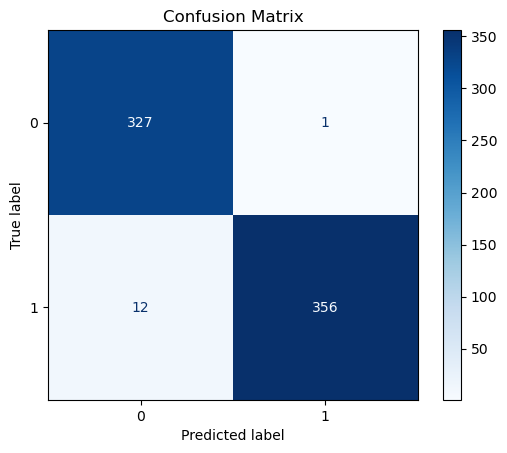

Accuracy: 0.9813218390804598
Precision: 0.9971988795518207
Recall: 0.967391304347826
F1 Score: 0.9820689655172414
Your C Value: 2000


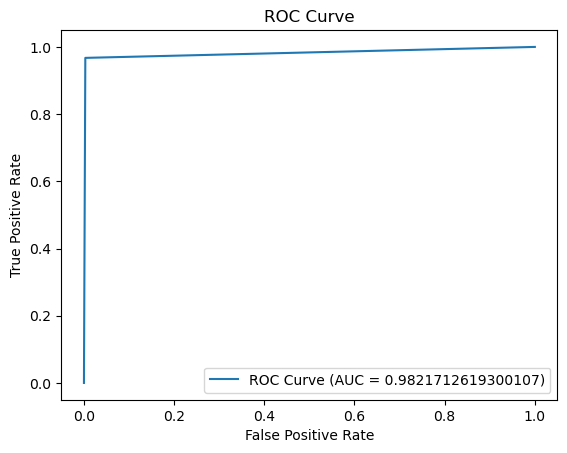

In [161]:
from sklearn.svm import SVC
from sklearn import metrics
# SVM with hard margin
C = 2000  

svm = SVC(kernel='linear', probability=True, C=C)
svm.fit(x_train_tfid_f, encoded_y_train)

# Predict the labels
y_pred = svm.predict(x_test_tfid_f)


# confusion matrix and plot
confusion_matrix = metrics.confusion_matrix(encoded_y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# metrics
accuracy = metrics.accuracy_score(encoded_y_test, y_pred)
precision = metrics.precision_score(encoded_y_test, y_pred)
recall = metrics.recall_score(encoded_y_test, y_pred)
f1_score = metrics.f1_score(encoded_y_test, y_pred)

# performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

# ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(encoded_y_test, y_pred)
auc = metrics.roc_auc_score(encoded_y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Confusion Matrix:
[[328   0]
 [368   0]]


<Figure size 640x480 with 0 Axes>

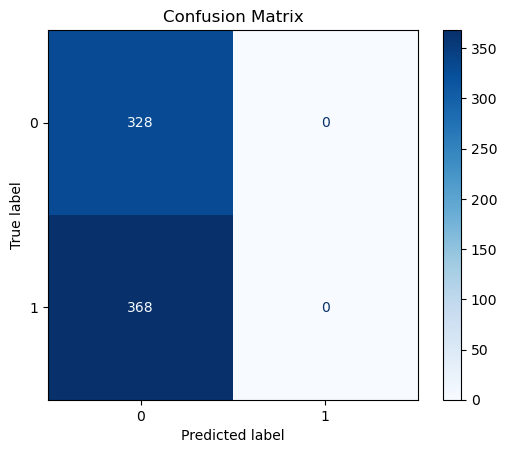

Accuracy: 0.47126436781609193
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Your C Value: 0.0005


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


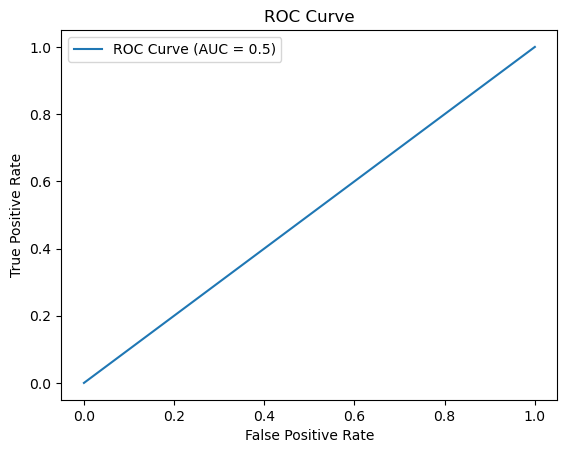

In [85]:
from sklearn.svm import SVC
from sklearn import metrics
# SVM with soft margin
C = 0.0005  

svm = SVC(kernel='linear', probability=True, C=C)
svm.fit(x_train_tfid_f, encoded_y_train)

# Predict the labels
y_pred = svm.predict(x_test_tfid_f)


# confusion matrix and plot
confusion_matrix = metrics.confusion_matrix(encoded_y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# metrics
accuracy = metrics.accuracy_score(encoded_y_test, y_pred)
precision = metrics.precision_score(encoded_y_test, y_pred)
recall = metrics.recall_score(encoded_y_test, y_pred)
f1_score = metrics.f1_score(encoded_y_test, y_pred)

# performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

# ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(encoded_y_test, y_pred)
auc = metrics.roc_auc_score(encoded_y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Confusion Matrix:
[[327   1]
 [ 12 356]]


<Figure size 640x480 with 0 Axes>

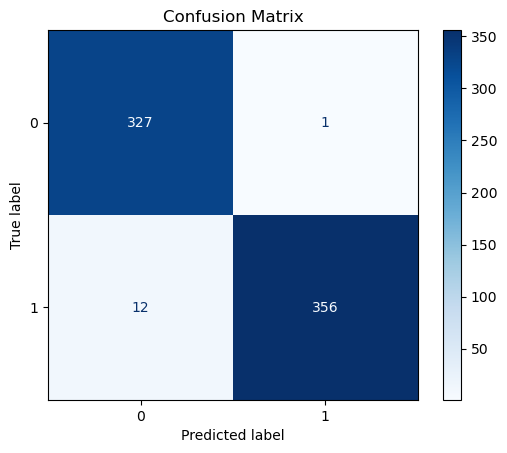

Accuracy: 0.9813218390804598
Precision: 0.9971988795518207
Recall: 0.967391304347826
F1 Score: 0.9820689655172414
Your C Value: 100000


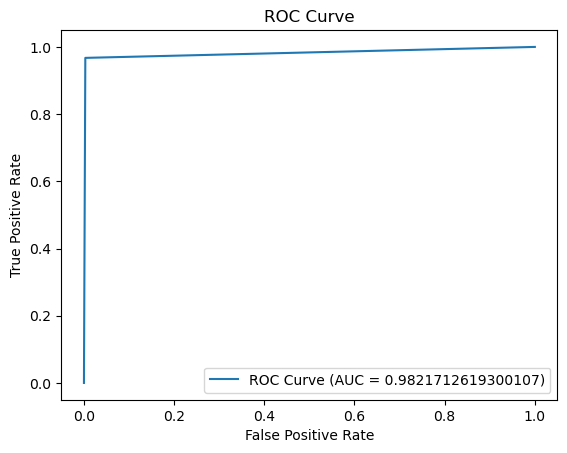

In [86]:
from sklearn.svm import SVC
from sklearn import metrics
# SVM with highest margin
C = 100000  

svm = SVC(kernel='linear', probability=True, C=C)
svm.fit(x_train_tfid_f, encoded_y_train)

# Predict the labels
y_pred = svm.predict(x_test_tfid_f)


# confusion matrix and plot
confusion_matrix = metrics.confusion_matrix(encoded_y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# metrics
accuracy = metrics.accuracy_score(encoded_y_test, y_pred)
precision = metrics.precision_score(encoded_y_test, y_pred)
recall = metrics.recall_score(encoded_y_test, y_pred)
f1_score = metrics.f1_score(encoded_y_test, y_pred)

# performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

# ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(encoded_y_test, y_pred)
auc = metrics.roc_auc_score(encoded_y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Best C: 1
Confusion Matrix:
[[327   1]
 [ 13 355]]


<Figure size 640x480 with 0 Axes>

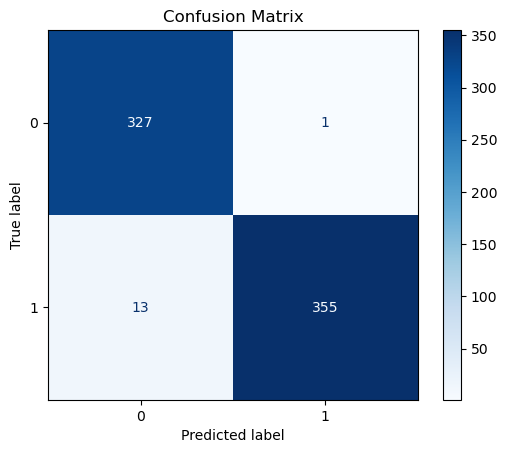

Accuracy: 0.9798850574712644
Precision: 0.9971910112359551
Recall: 0.9646739130434783
F1 Score: 0.9806629834254144
Your C Value: 100000


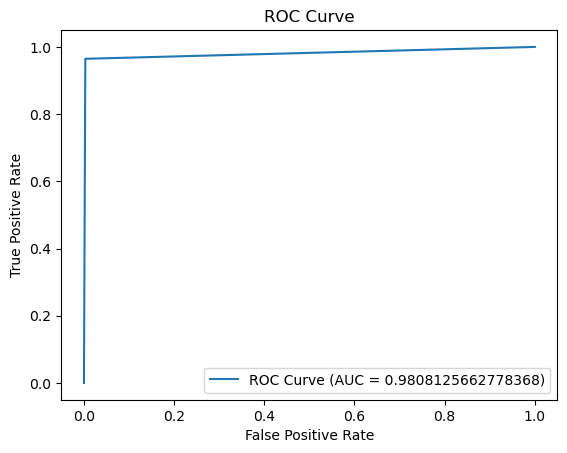

In [101]:
# Use cross-validation to choose γ:
# Using a 5-fold cross-validation, find the best value of the parameter γ in the range {10^k | -3 ≤ k ≤ 6, k ∈ Z}.
# Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision, and F-1 score of this best SVM.
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn import metrics
# SVM with soft margin
parameter_range = {'C': [10**k for k in range(-3, 7)]}

svm = SVC(kernel='linear', probability=True, C=C)

parameter_range_search = GridSearchCV(svm, parameter_range, cv = 5, scoring = 'accuracy')
parameter_range_search.fit(x_train_tfid_f, encoded_y_train)

the_best_C = parameter_range_search.best_params_['C']
print("Best C:", the_best_C)

svm = SVC(kernel='linear', probability=True, C=the_best_C)
svm.fit(x_train_tfid_f, encoded_y_train)

# Predict the labels
y_pred = svm.predict(x_test_tfid_f)


# confusion matrix and plot
confusion_matrix = metrics.confusion_matrix(encoded_y_test, y_pred)
print('Confusion Matrix:')
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# metrics
accuracy = metrics.accuracy_score(encoded_y_test, y_pred)
precision = metrics.precision_score(encoded_y_test, y_pred)
recall = metrics.recall_score(encoded_y_test, y_pred)
f1_score = metrics.f1_score(encoded_y_test, y_pred)

# performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Your C Value:', C)

# ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(encoded_y_test, y_pred)
auc = metrics.roc_auc_score(encoded_y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

===================================================================================================================

**Question 6: Evaluate a logistic classifier**

*Evaluate a logistic classifier:*

- Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear_model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision, and F-1 score of this classifier on the testing set.

- Find the optimal regularization coefficient:

- Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal regularization strength in the range {10k|−5 ≤ k ≤ 5,k ∈ Z} for logistic regression with L1 regularization and logistic regression with L2 regularization, respectively.
- Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.
- How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?
- Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. What is the difference between their ways to find this boundary? Why do their performances differ? Is this difference statistically significant?

***Answers***


Best reg strength for L1 reg: 1000.0
Best reg strength for L2 reg: 100.0
Logistic Classifier without Regularization:
Accuracy: 0.9798850574712644
Precision: 0.9971910112359551
Recall: 0.9646739130434783
F1 Score: 0.9806629834254144
Confusion Matrix - No Regularization:
[[327   1]
 [ 13 355]]


<Figure size 640x480 with 0 Axes>

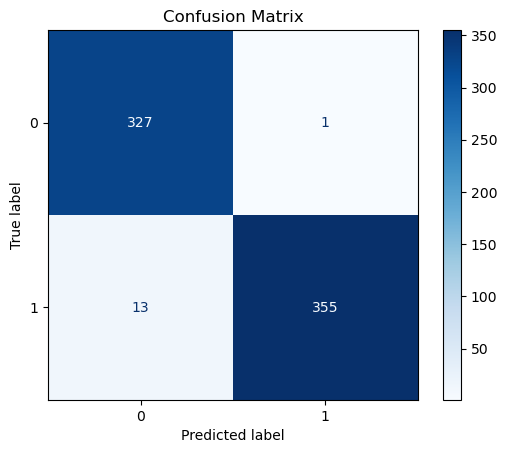

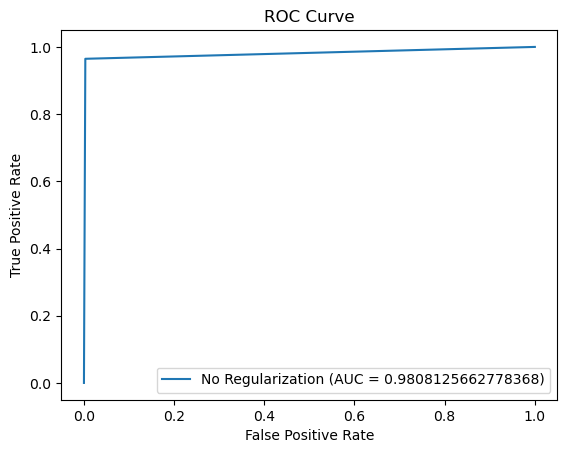

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegressionCV

regularization_strengths = [10**k for k in range(-5, 6)]

logistic_l1 = LogisticRegressionCV(Cs = regularization_strengths, cv = 5, penalty = 'l1', solver = 'liblinear')
logistic_l1.fit(x_train_tfid_f, encoded_y_train)

best_c_l1 = logistic_l1.C_[0]

logistic_l2 = LogisticRegressionCV(Cs = regularization_strengths, cv = 5, penalty = 'l2')
logistic_l2.fit(x_train_tfid_f, encoded_y_train)

best_c_l2 = logistic_l2.C_[0]

# Print Results
print("Best reg strength for L1 reg:", best_c_l1)
print("Best reg strength for L2 reg:", best_c_l2)

logistic_with_no_regularization = LogisticRegression(penalty = None, solver = 'saga', max_iter = 10000)
logistic_with_no_regularization.fit(x_train_tfid_f, encoded_y_train)
y_pred_with_no_regularization = logistic_with_no_regularization.predict(x_test_tfid_f)

# metrics calcs
accuracy_with_no_regularization = metrics.accuracy_score(encoded_y_test, y_pred_with_no_regularization)
precision_with_no_regularization = metrics.precision_score(encoded_y_test, y_pred_with_no_regularization, zero_division = 1)
recall_with_no_regularization = metrics.recall_score(encoded_y_test, y_pred_with_no_regularization)
f1_score_with_no_regularization = metrics.f1_score(encoded_y_test, y_pred_with_no_regularization)
print("Logistic Classifier without Regularization:")
print(f"Accuracy: {accuracy_with_no_regularization}")
print(f"Precision: {precision_with_no_regularization}")
print(f"Recall: {recall_with_no_regularization}")
print(f"F1 Score: {f1_score_with_no_regularization}")

# confusion matrix 
conf_matrix_with_no_regularization = metrics.confusion_matrix(encoded_y_test, y_pred_with_no_regularization)
print('Confusion Matrix - No Regularization:')
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_with_no_regularization).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve 
fpr_no_reg, tpr_no_reg, _ = roc_curve(encoded_y_test, y_pred_with_no_regularization)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg) 
plt.plot(fpr_no_reg, tpr_no_reg, label = f'No Regularization (AUC = {roc_auc_no_reg})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic Classifier with l1:
Accuracy: 0.9798850574712644
Precision: 0.9971910112359551
Recall: 0.9646739130434783
F1 Score: 0.9806629834254144
Confusion Matrix - l1:


<Figure size 640x480 with 0 Axes>

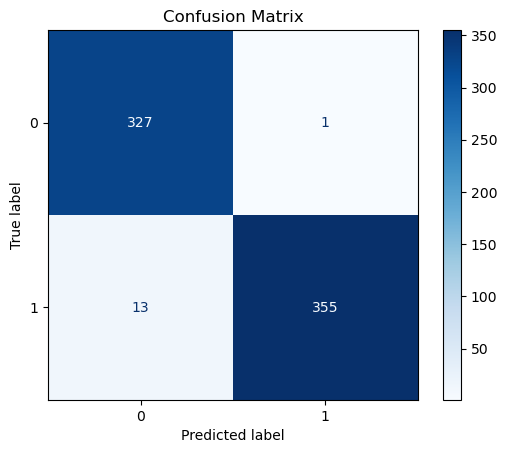

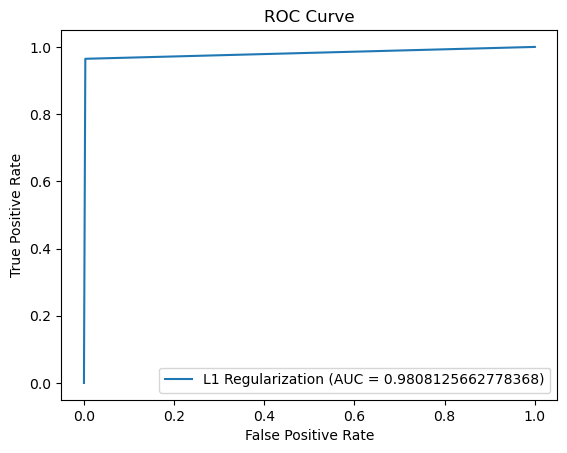

In [153]:
logistic_with_l1= LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 10000)
logistic_with_l1.fit(x_train_tfid_f, encoded_y_train)
y_pred_with_l1 = logistic_with_no_regularization.predict(x_test_tfid_f)

# metrics calcs
accuracy_with_l1 = metrics.accuracy_score(encoded_y_test, y_pred_with_l1)
precision_with_l1 = metrics.precision_score(encoded_y_test, y_pred_with_l1, zero_division = 1)
recall_with_l1 = metrics.recall_score(encoded_y_test, y_pred_with_l1)
f1_score_with_l1 = metrics.f1_score(encoded_y_test, y_pred_with_l1)
print("Logistic Classifier with l1:")
print(f"Accuracy: {accuracy_with_l1}")
print(f"Precision: {precision_with_l1}")
print(f"Recall: {recall_with_l1}")
print(f"F1 Score: {f1_score_with_l1}")

# confusion matrix 
conf_matrix_with_l1 = metrics.confusion_matrix(encoded_y_test, y_pred_with_l1)
print('Confusion Matrix - l1:')
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_with_l1).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve 
fpr_no_reg, tpr_no_reg, _ = roc_curve(encoded_y_test, y_pred_with_l1)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg) 
plt.plot(fpr_no_reg, tpr_no_reg, label = f'L1 Regularization (AUC = {roc_auc_no_reg})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic Classifier with l2:
Accuracy: 0.9798850574712644
Precision: 0.9971910112359551
Recall: 0.9646739130434783
F1 Score: 0.9806629834254144
Confusion Matrix - l2:


<Figure size 640x480 with 0 Axes>

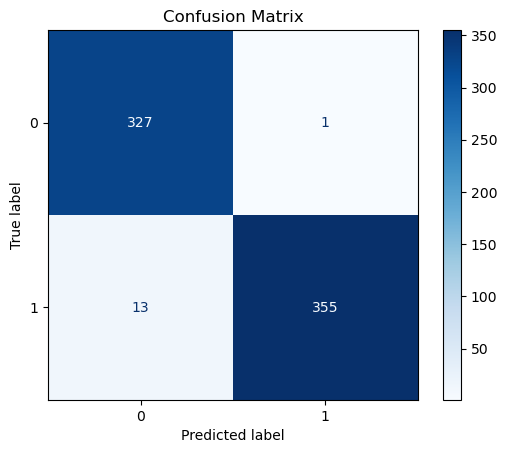

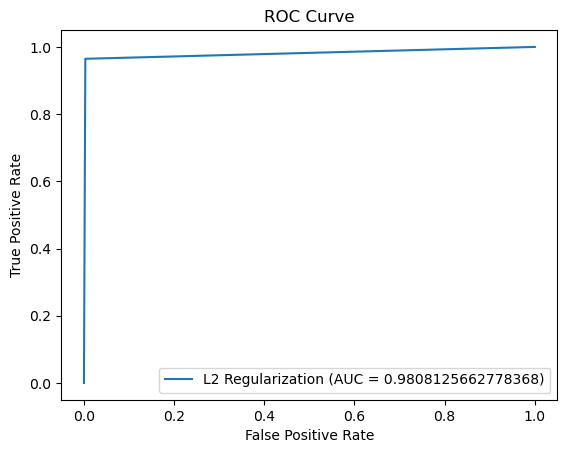

In [151]:
logistic_with_l2 = LogisticRegression(penalty = 'l2', solver = 'saga', max_iter = 10000)
logistic_with_l2.fit(x_train_tfid_f, encoded_y_train)
y_pred_with_l2 = logistic_with_no_regularization.predict(x_test_tfid_f)

# metrics calcs
accuracy_with_l2 = metrics.accuracy_score(encoded_y_test, y_pred_with_l2)
precision_with_l2 = metrics.precision_score(encoded_y_test, y_pred_with_l2, zero_division = 1)
recall_with_l2 = metrics.recall_score(encoded_y_test, y_pred_with_l2)
f1_score_with_l2 = metrics.f1_score(encoded_y_test, y_pred_with_l2)
print("Logistic Classifier with l2:")
print(f"Accuracy: {accuracy_with_l2}")
print(f"Precision: {precision_with_l2}")
print(f"Recall: {recall_with_l2}")
print(f"F1 Score: {f1_score_with_l2}")

# confusion matrix 
conf_matrix_with_l2 = metrics.confusion_matrix(encoded_y_test, y_pred_with_l2)
print('Confusion Matrix - l2:')
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_with_l2).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve 
fpr_no_reg, tpr_no_reg, _ = roc_curve(encoded_y_test, y_pred_with_l2)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg) 
plt.plot(fpr_no_reg, tpr_no_reg, label = f'L2 Regularization (AUC = {roc_auc_no_reg})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

===================================================================================================================

**QUESTION 7: Evaluate and profile a Na ̈ıve Bayes classifier**

Accuracy: 0.9410919540229885
Precision: 0.9554317548746518
Recall: 0.9320652173913043
F1 Score: 0.9436038514442916


<Figure size 640x480 with 0 Axes>

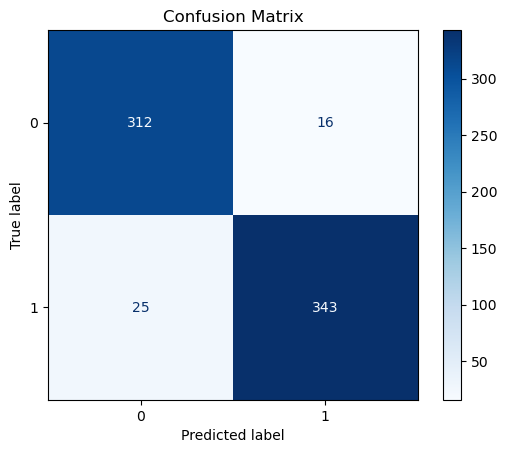

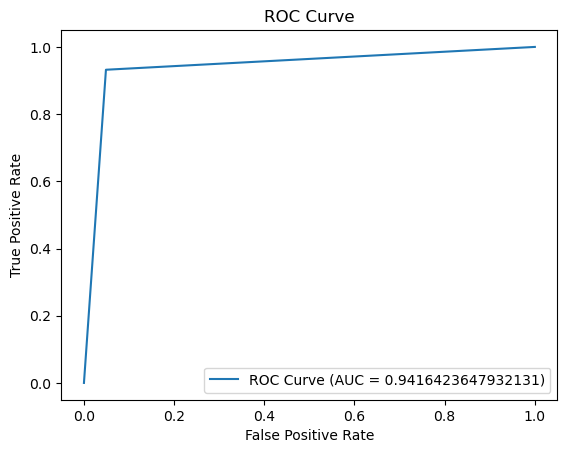

In [159]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train_tfid_f.toarray(), encoded_y_train)

# Predict labels 
y_pred_gnb = gnb.predict(x_test_tfid_f.toarray())

# metrics calcs
accuracy_with_gnb = metrics.accuracy_score(encoded_y_test, y_pred_gnb)
precision_with_gnb = metrics.precision_score(encoded_y_test, y_pred_gnb, zero_division = 1)
recall_with_gnb = metrics.recall_score(encoded_y_test, y_pred_gnb)
f1_score_with_gnb = metrics.f1_score(encoded_y_test, y_pred_gnb)
print(f"Accuracy: {accuracy_with_gnb}")
print(f"Precision: {precision_with_gnb}")
print(f"Recall: {recall_with_gnb}")
print(f"F1 Score: {f1_score_with_gnb}")

# confusion matrix 
conf_matrix_with_gnb = metrics.confusion_matrix(encoded_y_test, y_pred_gnb)
plt.figure()
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_with_gnb).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve 
fpr_no_reg, tpr_no_reg, _ = roc_curve(encoded_y_test, y_pred_gnb)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg) 
plt.plot(fpr_no_reg, tpr_no_reg, label=f'ROC Curve (AUC = {roc_auc_no_reg})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

===================================================================================================================

**QUESTION 8: Best model for binary classification**

In [168]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

pipeline = Pipeline([
    ('dim_red', 'passthrough'),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', probability=True))
])

param_grid = {
    'dim_red': [
        TruncatedSVD(n_components=5, random_state=42),
        TruncatedSVD(n_components=30, random_state=42),
        TruncatedSVD(n_components=100, random_state=42),
        NMF(n_components=5, init='random', random_state=42),
        NMF(n_components=30, init='random', random_state=42),
        NMF(n_components=100, init='random', random_state=42),
    ],
    'clf': [
        SVC(kernel='linear', probability=True, C=the_best_C),
        LogisticRegression(penalty='l1', solver='saga', C=best_c_l1, max_iter=1000),
        LogisticRegression(penalty='l2', solver='saga', C=best_c_l2, max_iter=1000),
        GaussianNB()
    ]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train_tfid_f, encoded_y_train)
cv_results = grid_search.cv_results_
print(cv_results)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:

{'mean_fit_time': array([1.47184229e-01, 3.02435827e-01, 9.09967613e-01, 6.96774960e-01,
       4.56898022e+00, 6.49863530e+01, 7.12349415e-02, 3.78301334e-01,
       2.63973069e+00, 6.85008955e-01, 4.87720461e+00, 6.59631662e+01,
       7.41114140e-02, 2.43865871e-01, 8.75838280e-01, 5.97503233e-01,
       4.37073884e+00, 6.55646918e+01, 5.75980186e-02, 1.56050253e-01,
       6.00083065e-01, 5.44185257e-01, 4.12354946e+00, 6.09176714e+01]), 'std_fit_time': array([0.00909407, 0.01182988, 0.03551412, 0.12591291, 0.82319602,
       1.27681829, 0.00526701, 0.04740896, 0.05901356, 0.13074974,
       0.74507579, 1.75279756, 0.00998758, 0.02674022, 0.04536985,
       0.11694921, 0.7902453 , 0.91978569, 0.0026005 , 0.01344389,
       0.02990486, 0.11332356, 0.82259666, 0.81785095]), 'mean_score_time': array([0.00507674, 0.0099906 , 0.02257681, 0.01404939, 0.07166681,
       0.40511003, 0.00108304, 0.00343285, 0.00673165, 0.00982151,
       0.06202197, 0.36115007, 0.00112944, 0.00359426, 0.007

In [170]:
sorted_indices = cv_results['mean_test_score'].argsort()[::-1]

print("Top 5 Combinations:")
top_5_combinations = []
for i in range(5):
    idx = sorted_indices[i]
    mean_score = cv_results['mean_test_score'][idx]
    params = cv_results['params'][idx]
    print(f"Rank {i+1}:")
    print(f"  Mean CV Accuracy: {mean_score:.4f}")
    print(f"  Parameters: {params}")
    top_5_combinations.append(params)

print("\nEvaluating Top 5 Combinations on Test Data:")
for i, params in enumerate(top_5_combinations):
    print(f"\nEvaluating Combination {i+1}...")

Top 5 Combinations:
Rank 1:
  Mean CV Accuracy: 0.9597
  Parameters: {'clf': LogisticRegression(C=100.0, max_iter=1000, solver='saga'), 'dim_red': TruncatedSVD(n_components=100, random_state=42)}
Rank 2:
  Mean CV Accuracy: 0.9597
  Parameters: {'clf': LogisticRegression(C=1000.0, max_iter=1000, penalty='l1', solver='saga'), 'dim_red': TruncatedSVD(n_components=100, random_state=42)}
Rank 3:
  Mean CV Accuracy: 0.9568
  Parameters: {'clf': LogisticRegression(C=1000.0, max_iter=1000, penalty='l1', solver='saga'), 'dim_red': NMF(init='random', n_components=100, random_state=42)}
Rank 4:
  Mean CV Accuracy: 0.9550
  Parameters: {'clf': SVC(C=1, kernel='linear', probability=True), 'dim_red': TruncatedSVD(n_components=100, random_state=42)}
Rank 5:
  Mean CV Accuracy: 0.9504
  Parameters: {'clf': LogisticRegression(C=100.0, max_iter=1000, solver='saga'), 'dim_red': NMF(init='random', n_components=100, random_state=42)}

Evaluating Top 5 Combinations on Test Data:

Evaluating Combination 1..

NameError: name 'fit_predict_and_evaluate' is not defined

===================================================================================================================

**QUESTION 9: Classifiers on documents belonging to unique classes in leaf_label**

In [ ]:
df = pd.read_csv('Project1-ClassificationDataset.csv')

# Split data, but with leaf_label included this time
train, test = train_test_split(df[["full_text","root_label","leaf_label"]], test_size = 0.2)

print('Number of data points in train data:', train.shape[0])
print('Number of data points in test data:', test.shape[0])

===================================================================================================================

**QUESTION 10: GLOVE embeddings**

===================================================================================================================

**QUESTION 11: Binary classification between sports and climate class**

===================================================================================================================

**QUESTION 12: Plot relationship b/w dim of pre-trained GLOVE embedding and accuracy of model in classification task**

===================================================================================================================

**QUESTION 13: Compare and contrast two visualizations**